# 第一章 统计学习方法概论

##  统计学习
实现统计学习得方法步骤  
(1) 得到一个有限的训练数据集合；  
(2) 确定包含所有可能的模型的假设空间，即学习模型的集合；  
(3) 确定模型选择的准则，即学习的策略；  
(4) 实现求解最优模型的方法，即学习的算法；  
(5) 通过学习方法选择最优模型；  
(6) 利用学习的最优模型对新数据进行预测或分析。
    
 
##  监督学习  
  输入空间：输入的所有的可能值的集合。  
   特征空间：所有特征向量存在得空间。  
    输出空间：输出的所有可能值得集合。  
     联合概率分布：监督学习假设输入和输出得随机变量$X$和$Y$遵循联合概率分布$P(X,Y)$，$P(X,Y)$表示分布函数或分布密度函数。
     
##  统计学习三要素  
统计学习方法都是由模型、策略和算法组成，统计学习三要素可以简单得表示为：  
<center>方法 = 模型 + 策略 + 算法</center>  
期望损失（风险函数）：损失函数关于$X$，$Y$的联合概率分布$P(X,Y)$的期望损失；  
经验损失（经验风险）：模型$f(X)$关于训练集数据的平均损失；  
结构化风险最小化：在经验风险最小化的基础上加上表示模型复杂度的正则化项。  

##  模型评估与模型选择  
训练误差：模型$Y=\hat{f}(X)$关于训练集的平均损失；  
测试误差：模型$Y=\hat{f}(X)$关于测试集的平均损失。

对p11例1.1利用最小二乘法拟合多项式求解  
本次用$y=sin2\pi{x}$作为目标函数，用多项式来拟合改函数

In [1]:
import numpy as np
import scipy as sp
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# f = np.poly1d([3,2,1])
# print(type(f))

<class 'numpy.poly1d'>


In [2]:
# 目标函数
def object_fn(x):
    return np.sin(2 * np.pi * x)

# 多项式拟合函数
def fit_fn(p, x):
    f = np.poly1d(p)
    '''
    输入一个数组p，如p = [3,2,1],
    poly1d得到一个多项式：3x^2 + 2x^1 + 1x^0
    '''
    return f(x)

# 定义代价函数
def loss_fn(p, x, y):
    loss = fit_fn(p, x) - y
    return loss

In [17]:
loss_fn

<function __main__.loss_fn(p, x, y)>

构造数据

In [3]:
x = np.linspace(0, 1, 10)
x_points = np.linspace(0, 1, 1000)

# 对原数值加上正态分布的数值作为噪音
y_ = object_fn(x)
y = [i + np.random.normal(0,0.1) for i in y_]

利用多项式来拟合

In [10]:
def fit(M=0):
    '''M: 多项式的次数'''
    # 初始化随机生成多项式的参数值
    p = np.random.randn(M + 1)
    
    # 利用最小二乘法来拟合
    '''
    leastsq(func, x0, args=())一般指定这三个参数就可以
    func：定义的代价函数；
    x0：计算的初始参数值；
    args：func函数的其他参数,
    函数返回一个元组，
    第一项为得到的参数的值，第二项为代价函数的值
    '''
    p_lsq = leastsq(loss_fn, p, args=(x, y))
    
    # 可视化
    plt.plot(x_points, object_fn(x_points), label='real')
    plt.plot(x_points, fit_fn(p_lsq[0], x_points), label='fitted crrve')
    plt.plot(x, y, 'bo', label = 'noise')
    plt.legend()
    return p_lsq

M=0

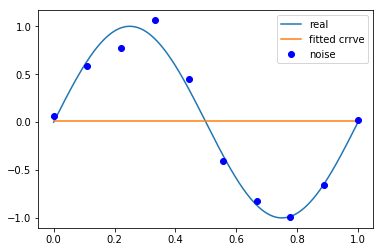

In [11]:
p_lsq = fit()

M=3

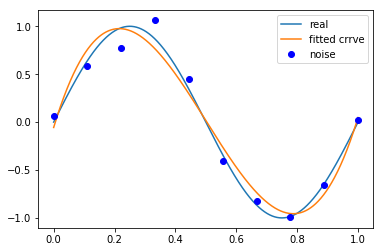

In [12]:
p_lsq = fit(M=3)

M=5

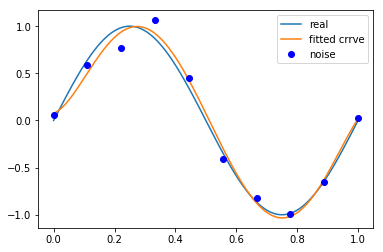

In [13]:
p_lsq = fit(M=5)

M=7

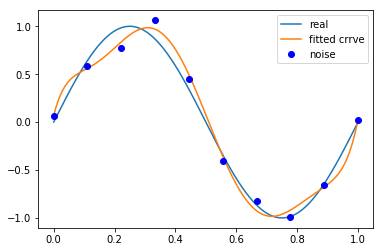

In [14]:
p_lsq = fit(M=7)

M=9

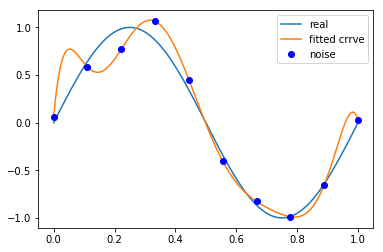

In [15]:
p_lsq = fit(M=9)